In [1]:
import invoiceTool
import uuid
import pandas as pd
pd.set_option('display.max_rows', 500)

peers = [invoiceTool.peer(addr=invoiceTool.addr1, crt=invoiceTool.crt1),
         invoiceTool.peer(addr=invoiceTool.addr2, crt=invoiceTool.crt2)]

# Load some invoices, add hash values

In [12]:
invoices = pd.read_csv('/home/jovyan/work/supermarketsales.csv')  
invoices.set_index('Invoice ID', inplace=True)
invoices['hash'] = invoices.apply(lambda x: hash(tuple(x)), axis = 1)

In [13]:
invoices.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,hash
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,-5375403527486662107
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1907424623461449270
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,5064197744698540268
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,6562289782271897332
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,-7283733478897645871


# Store only data needed for the usecases in the blockchain 

In [5]:
def createInvoiceFromData(index=1,id = 41):
    row = invoices.iloc[index]
    invoiceid = row.name
    tax = row['Tax 5%']
    netto = row['Total'] - tax
    hashvalue = row['hash']
    return invoiceTool.createInvoice(id=id,invoiceNumber=invoiceid,vat=tax,netto=netto,countryOrigin='US',hash=hashvalue)

for x in range(0,99):
    createInvoiceFromData(index=x,id = 400 + x)

# Decentral peers interact with the blockchain

In [22]:
import invoiceWidget

f = invoiceWidget.invoice_widgets(peers=peers)

Dropdown(description='Ledger', layout=Layout(width='400px'), options=('mychannel',), style=DescriptionStyle(de…

Dropdown(description='Peer', layout=Layout(width='400px'), options=('peer0.org1.example.com:7051', 'peer0.org2…

Text(value='', description='Hash (invoice)', disabled=True, layout=Layout(width='400px'), style=DescriptionSty…

Text(value='', description='id', layout=Layout(width='400px'), style=DescriptionStyle(description_width='150px…

Text(value='', description='Rechnungsnummer', disabled=True, layout=Layout(width='400px'), style=DescriptionSt…

Text(value='', description='VAT', disabled=True, layout=Layout(width='400px'), style=DescriptionStyle(descript…

Text(value='', description='Netto', disabled=True, layout=Layout(width='400px'), style=DescriptionStyle(descri…

Text(value='DE', description='country (origin)', disabled=True, layout=Layout(width='400px'), style=Descriptio…

Text(value='', description='country (receiver)', disabled=True, layout=Layout(width='400px'), style=Descriptio…

Checkbox(value=False, description='received (invoice)', disabled=True, layout=Layout(width='400px'), style=Des…

Checkbox(value=False, description='received (order)', disabled=True, layout=Layout(width='400px'), style=Descr…

Checkbox(value=False, description='Forderungsabtritt', disabled=True, layout=Layout(width='400px'), style=Desc…

Checkbox(value=False, description='Forderung bezahlt', disabled=True, layout=Layout(width='400px'), style=Desc…

Text(value='', description='Forderung erhalten von', disabled=True, layout=Layout(width='400px'), style=Descri…

Dropdown(description='Steuerbefreieungsgrund', disabled=True, layout=Layout(width='400px'), options=('', 'Ausf…

Checkbox(value=False, description='Umsatzsteuer abgeführt', disabled=True, layout=Layout(width='400px'), style…

# Analytics

<AxesSubplot:xlabel='Total', ylabel='Product line'>

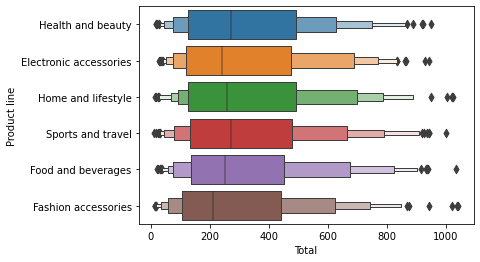

In [19]:
sns.boxenplot(y = 'Product line', x = 'Total', data=invoices )

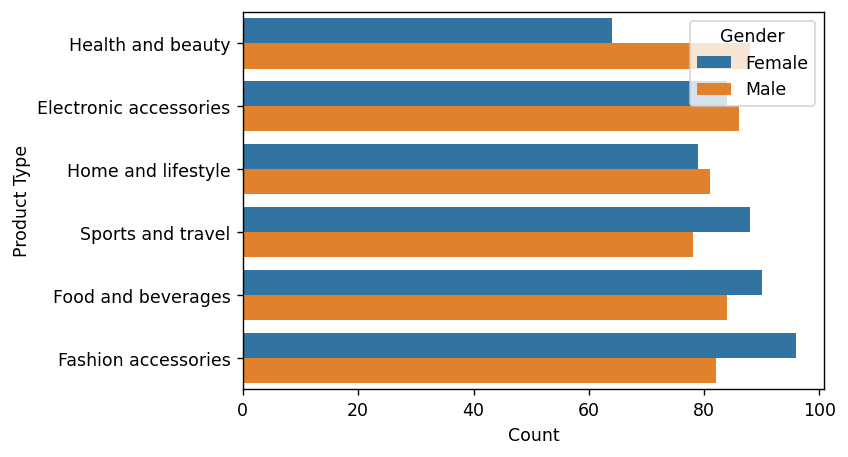

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = invoices) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()